In [214]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import re

In [215]:
warnings.filterwarnings("ignore")

In [216]:
df=pd.read_csv(r"C:\Users\Ganesshh TL\Desktop\Mini Projects\Telecom\telecom_churn.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [217]:
# for displaying all the columns in the dataset
pd.set_option("display.max.columns", None)

In [218]:
df

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [219]:
df.mobile_number.nunique()

99999

In [220]:
# mobile_number can be given as index column
df.set_index('mobile_number',inplace=True)

In [221]:
# taking only the high value customers for churn modelling
df['avg']=(df.total_rech_amt_6+df.total_rech_amt_7)/2
per_70=np.percentile(df['avg'], 70)
per_70

368.5

In [222]:
df=df[df['avg']>=per_70]
df.shape

(30011, 226)

#### Creating target variable `churn`

In [223]:
df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']]

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
mobile_number,,,,
7000701601,0.00,0.00,0.00,0.00
7001524846,34.91,142.18,0.00,0.00
7002191713,631.86,446.09,0.00,0.00
7000875565,334.56,255.74,0.00,0.00
7000187447,87.13,631.08,0.00,0.00
...,...,...,...,...
7001386760,248.88,402.71,0.00,0.00
7001453306,88.63,368.49,0.00,0.00
7001729035,547.11,1095.24,9.14,941.48


In [224]:
df['churn']=0
df.loc[(df['total_ic_mou_9']==0.00) & (df['total_og_mou_9']==0.00) & 
        (df['vol_2g_mb_9']==0.00) & (df['vol_3g_mb_9']==0.00), 'churn']=1

In [225]:
df.churn.value_counts()

0    27418
1     2593
Name: churn, dtype: int64

In [226]:
# for col in df.columns:
#     if '_9' in col:
#         print(col)

In [227]:
# we have created the target column so we dont need 9th month's data anymore we can drop them.
lst=[col for col in df.columns if '_9' in col]
df.drop(lst, axis=1, inplace=True)
df.shape

(30011, 173)

In [228]:
print('Churn Rate : {0}%'.format(round(((sum(df['churn'])/len(df['churn']))*100),2)))

Churn Rate : 8.64%


#### finding and removing columns with low variance

In [229]:
const=[]
for col in df.columns:
    if df[col].nunique()==1:
        const.append(col)
print(const)
df = df.drop(const, axis=1)

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [230]:
# finding categorical columns
cat_cols = []
for col in df.columns:
    if df[col].nunique()==2:
        cat_cols.append(col)

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7000701601 to 7000498689
Columns: 160 entries, arpu_6 to churn
dtypes: float64(128), int64(26), object(6)
memory usage: 36.9+ MB


There are 6 objects columns which should be handled

In [232]:
date_cols = (df.select_dtypes(include=["object"])).columns
date_cols

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')

In [233]:
# converting date_cols dtype from object->datetime
df.loc[:,date_cols] = df.loc[:,date_cols].apply(pd.to_datetime)

In [234]:
df.shape

(30011, 160)

## Handling missing values

In [235]:
# these columns have missing value above 70% percentage of the total
df.columns[(df.isnull().sum()>18003)]

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8'],
      dtype='object')

In [236]:
df[['night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8']]

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8
mobile_number,,,,,,
7000701601,NaN,NaN,NaN,NaN,NaN,NaN
7001524846,NaN,0.0,0.0,NaN,1.0,1.0
7002191713,NaN,NaN,0.0,NaN,NaN,1.0
7000875565,NaN,NaN,NaN,NaN,NaN,NaN
7000187447,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
7001386760,0.0,0.0,NaN,0.0,0.0,NaN
7001453306,NaN,NaN,NaN,NaN,NaN,NaN
7001729035,0.0,0.0,0.0,1.0,1.0,1.0


In [237]:
# the above columns are categorical variables so we can replace this missing values as a seperate category.
df[['night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8']] = df[['night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8']].fillna(2, axis=1)

In [238]:
df[['night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8']].isnull().sum()

night_pck_user_6    0
night_pck_user_7    0
night_pck_user_8    0
fb_user_6           0
fb_user_7           0
fb_user_8           0
dtype: int64

In [239]:
# the missing values in these columns seems to be unavailable data (recharge not done) so we can fill these columns by zero. 
cols_to_fill_by_zero = ['count_rech_3g_6','max_rech_data_6','arpu_3g_6','total_rech_data_6',
  'count_rech_2g_6','arpu_2g_6','count_rech_3g_7','max_rech_data_7',
  'arpu_3g_7','total_rech_data_7','count_rech_2g_7','arpu_2g_7','count_rech_3g_8',
  'max_rech_data_8','arpu_3g_8','total_rech_data_8','count_rech_2g_8',
  'arpu_2g_8',"av_rech_amt_data_6", "av_rech_amt_data_7", "av_rech_amt_data_8"]

In [240]:
df[cols_to_fill_by_zero] = df[cols_to_fill_by_zero].fillna(0, axis=1)

In [241]:
calls_usage_6 = []
for col in df.columns:
    if re.search('(mou_6)|(others_6)', col):
        calls_usage_6.append(col)
calls_usage_7 = []
for col in df.columns:
    if re.search('(mou_7)|(others_7)', col):
        calls_usage_7.append(col)
calls_usage_8 = []
for col in df.columns:
    if re.search('(mou_8)|(others_8)', col):
        calls_usage_8.append(col)

In [242]:
df.shape

(30011, 160)

In [243]:
df[calls_usage_6].isnull().sum()

onnet_mou_6         316
offnet_mou_6        316
roam_ic_mou_6       316
roam_og_mou_6       316
loc_og_t2t_mou_6    316
loc_og_t2m_mou_6    316
loc_og_t2f_mou_6    316
loc_og_t2c_mou_6    316
loc_og_mou_6        316
std_og_t2t_mou_6    316
std_og_t2m_mou_6    316
std_og_t2f_mou_6    316
std_og_mou_6        316
isd_og_mou_6        316
spl_og_mou_6        316
og_others_6         316
total_og_mou_6        0
loc_ic_t2t_mou_6    316
loc_ic_t2m_mou_6    316
loc_ic_t2f_mou_6    316
loc_ic_mou_6        316
std_ic_t2t_mou_6    316
std_ic_t2m_mou_6    316
std_ic_t2f_mou_6    316
std_ic_mou_6        316
total_ic_mou_6        0
spl_ic_mou_6        316
isd_ic_mou_6        316
ic_others_6         316
dtype: int64

In [244]:
df[calls_usage_6] = df[calls_usage_6].fillna(0, axis=1)

In [245]:
df[calls_usage_6].isnull().sum()

onnet_mou_6         0
offnet_mou_6        0
roam_ic_mou_6       0
roam_og_mou_6       0
loc_og_t2t_mou_6    0
loc_og_t2m_mou_6    0
loc_og_t2f_mou_6    0
loc_og_t2c_mou_6    0
loc_og_mou_6        0
std_og_t2t_mou_6    0
std_og_t2m_mou_6    0
std_og_t2f_mou_6    0
std_og_mou_6        0
isd_og_mou_6        0
spl_og_mou_6        0
og_others_6         0
total_og_mou_6      0
loc_ic_t2t_mou_6    0
loc_ic_t2m_mou_6    0
loc_ic_t2f_mou_6    0
loc_ic_mou_6        0
std_ic_t2t_mou_6    0
std_ic_t2m_mou_6    0
std_ic_t2f_mou_6    0
std_ic_mou_6        0
total_ic_mou_6      0
spl_ic_mou_6        0
isd_ic_mou_6        0
ic_others_6         0
dtype: int64

In [246]:
df[calls_usage_7].isnull().sum()

onnet_mou_7         303
offnet_mou_7        303
roam_ic_mou_7       303
roam_og_mou_7       303
loc_og_t2t_mou_7    303
loc_og_t2m_mou_7    303
loc_og_t2f_mou_7    303
loc_og_t2c_mou_7    303
loc_og_mou_7        303
std_og_t2t_mou_7    303
std_og_t2m_mou_7    303
std_og_t2f_mou_7    303
std_og_mou_7        303
isd_og_mou_7        303
spl_og_mou_7        303
og_others_7         303
total_og_mou_7        0
loc_ic_t2t_mou_7    303
loc_ic_t2m_mou_7    303
loc_ic_t2f_mou_7    303
loc_ic_mou_7        303
std_ic_t2t_mou_7    303
std_ic_t2m_mou_7    303
std_ic_t2f_mou_7    303
std_ic_mou_7        303
total_ic_mou_7        0
spl_ic_mou_7        303
isd_ic_mou_7        303
ic_others_7         303
dtype: int64

In [247]:
df[calls_usage_7] = df[calls_usage_7].fillna(0,axis=1)

In [248]:
df[calls_usage_8].isnull().sum()

onnet_mou_8         938
offnet_mou_8        938
roam_ic_mou_8       938
roam_og_mou_8       938
loc_og_t2t_mou_8    938
loc_og_t2m_mou_8    938
loc_og_t2f_mou_8    938
loc_og_t2c_mou_8    938
loc_og_mou_8        938
std_og_t2t_mou_8    938
std_og_t2m_mou_8    938
std_og_t2f_mou_8    938
std_og_mou_8        938
isd_og_mou_8        938
spl_og_mou_8        938
og_others_8         938
total_og_mou_8        0
loc_ic_t2t_mou_8    938
loc_ic_t2m_mou_8    938
loc_ic_t2f_mou_8    938
loc_ic_mou_8        938
std_ic_t2t_mou_8    938
std_ic_t2m_mou_8    938
std_ic_t2f_mou_8    938
std_ic_mou_8        938
total_ic_mou_8        0
spl_ic_mou_8        938
isd_ic_mou_8        938
ic_others_8         938
dtype: int64

In [249]:
df[calls_usage_8] = df[calls_usage_8].fillna(0,axis=1)

In [250]:
# Leaving date cols as null intentionally for feature engineering
null = df.isnull().sum().reset_index(name='missing_cnt')
null.loc[null['missing_cnt']>0].sort_values('missing_cnt', ascending=False)

,index,missing_cnt
105,date_of_last_rech_data_6,18614
106,date_of_last_rech_data_7,18349
107,date_of_last_rech_data_8,18257
101,date_of_last_rech_8,594
100,date_of_last_rech_7,114
99,date_of_last_rech_6,62


In [251]:
df.shape

(30011, 160)

###  EDA

In [252]:
def box(col):
    return sns.boxplot(x=df['churn'], y=df[col])
def pairplot(lst):
    lst.append('churn')
    return sns.pairplot(data=df[lst],hue='churn')
def plot_cat(col):
    return df.groupby(col)['churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,7), title=col)

def plot_binned(col, bin_num):
    bins=np.linspace(min(df[col]), max(df[col]), bin_num)
    print(bins)
    labels=['B'+str(i) for i in range(bin_num-1)]
    # binning
    df2=df.copy()
    df2[col+'_bin']=pd.cut(df[col], bins, labels=labels, include_lowest=True)
    return df2.groupby(col+'_bin')['churn'].value_counts(normalize=True).unstack().plot(kind='bar', title=col, figsize=(12,6));

<AxesSubplot:xlabel='churn', ylabel='count'>

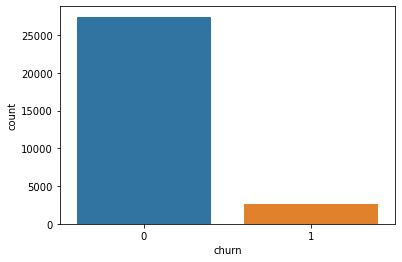

In [253]:
sns.countplot(x=df['churn'])

The target class is imbalanced. So we have to handle class imbalance using appropriate techniques

<AxesSubplot:xlabel='churn', ylabel='aon'>

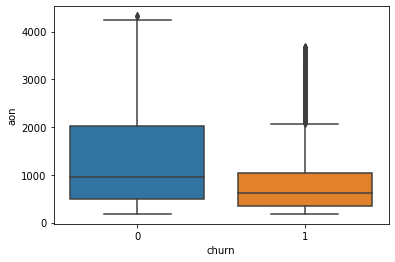

In [254]:
box('aon')

The customers who has less aon value has a more chance of churn. There are outliers.

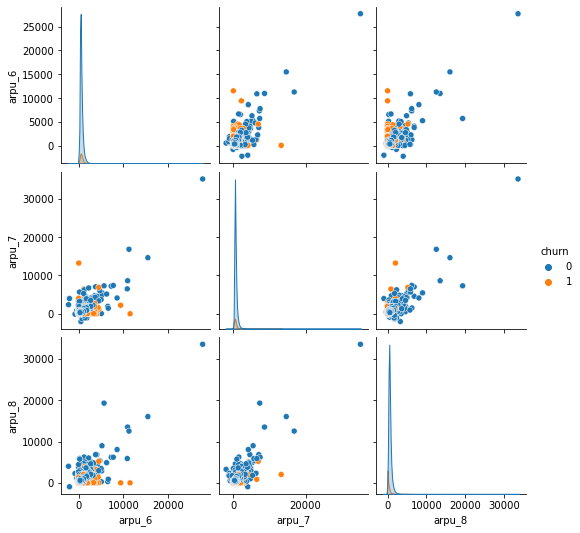

In [255]:
pairplot(['arpu_6', 'arpu_7', 'arpu_8'])

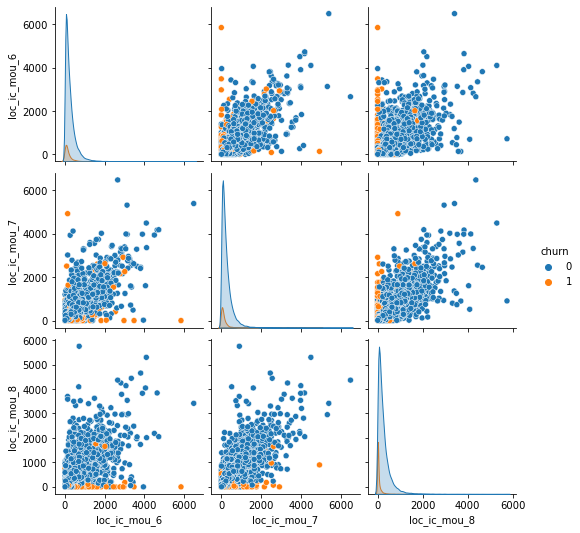

In [256]:
pairplot(['loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',])

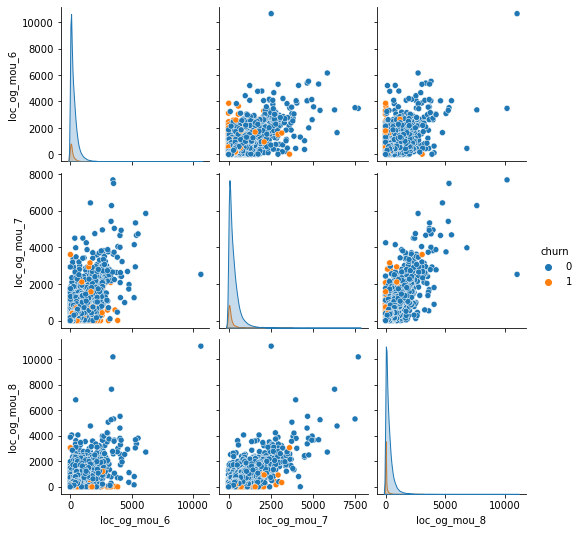

In [257]:
pairplot(['loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',])

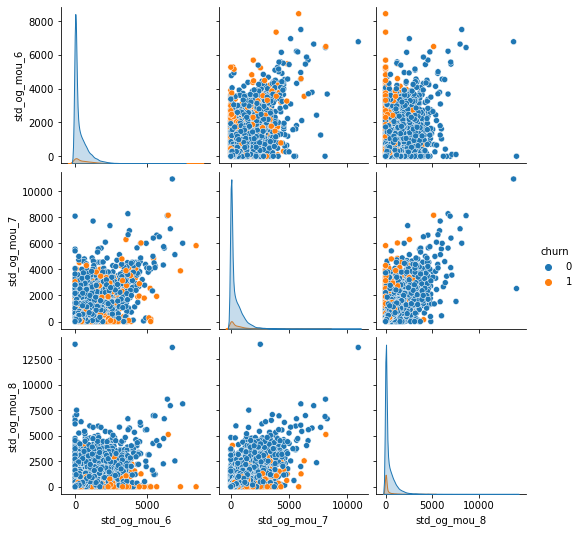

In [258]:
pairplot(['std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',])

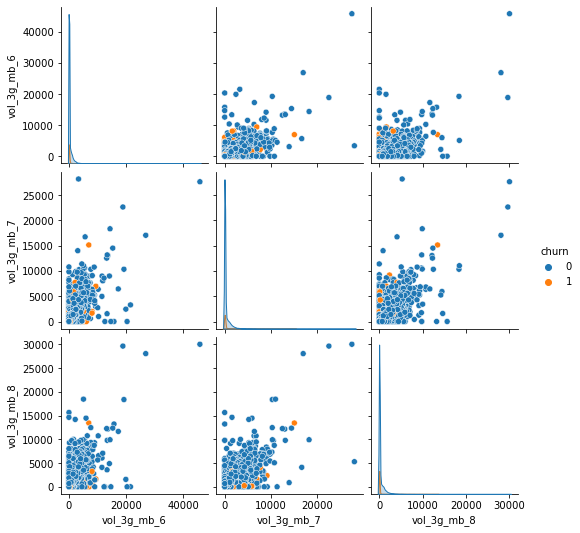

In [259]:
pairplot(['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'])

From the above graphs we can find that there are lots of outliers in the dataset they have to be handled.

<AxesSubplot:title={'center':'fb_user_6'}, xlabel='fb_user_6'>

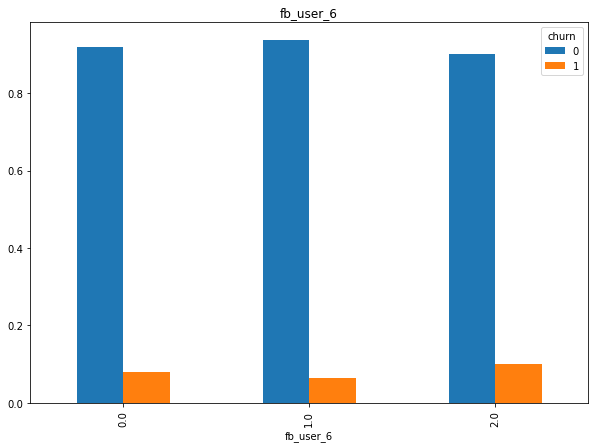

In [260]:
plot_cat('fb_user_6')

[   0.         1389.93666667 2779.87333333 4169.81      ]


<AxesSubplot:title={'center':'roam_ic_mou_8'}, xlabel='roam_ic_mou_8_bin'>

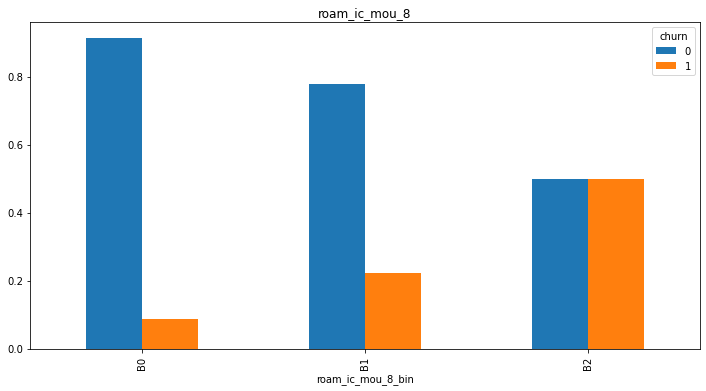

In [261]:
plot_binned('roam_ic_mou_8', 4)

[   0.    2995.355 5990.71 ]


<AxesSubplot:title={'center':'total_ic_mou_8'}, xlabel='total_ic_mou_8_bin'>

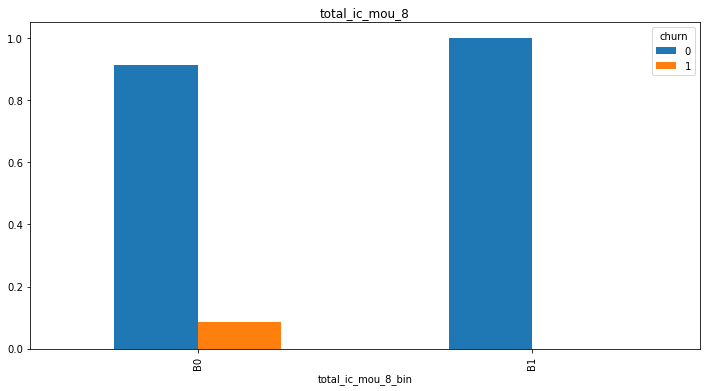

In [262]:
plot_binned('total_ic_mou_8', 3)

### Outliers treatment

In [263]:
for col in df.columns.tolist():
    percentiles = df[col].quantile([0.01,0.99]).values
    #data[col][data[col] <= percentiles[0]] = percentiles[0]
    df[col][df[col] >= percentiles[1]] = percentiles[1]


In [264]:
df.shape

(30011, 160)

### Deriving columns

In [265]:
calls_usage_6

['onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'total_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6']

In [266]:
# df["loc_out_6"] = df[['loc_og_t2t_mou_6','loc_og_t2m_mou_6',
#                      'loc_og_t2f_mou_6','loc_og_t2c_mou_6',
#                      'loc_og_mou_6']].sum(axis=1)/5
# df["loc_out_7"] = df[['loc_og_t2t_mou_7','loc_og_t2m_mou_7',
#                      'loc_og_t2f_mou_7','loc_og_t2c_mou_7',
#                      'loc_og_mou_7']].sum(axis=1)/5
# df["loc_out_8"] = df[['loc_og_t2t_mou_8','loc_og_t2m_mou_8',
#                      'loc_og_t2f_mou_8','loc_og_t2c_mou_8',
#                      'loc_og_mou_8']].sum(axis=1)/5

# df["loc_inc_6"] = df[['loc_ic_t2t_mou_6','loc_ic_t2m_mou_6',
#                      'loc_ic_t2f_mou_6','loc_ic_mou_6']].sum(axis=1)/5
# df["loc_inc_7"] = df[['loc_ic_t2t_mou_7','loc_ic_t2m_mou_7',
#                      'loc_ic_t2f_mou_7','loc_ic_mou_7']].sum(axis=1)/5
# df["loc_inc_8"] = df[['loc_ic_t2t_mou_8','loc_ic_t2m_mou_8',
#                      'loc_ic_t2f_mou_8','loc_ic_mou_8']].sum(axis=1)/5


In [299]:
cols = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
# recent date of recharge in the last 3 months
df['last_rech_date'] = df[cols].max(axis=1)
# using last date of august we found the days of last recharge
df['days_diff_last_rech'] = np.floor(( pd.to_datetime('2014-08-31', format='%Y-%m-%d') - df['last_rech_date'] ).astype('timedelta64[D]'))

In [302]:
df.columns[df.isnull().sum()>0]

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')

### Model building

Creating target and feature columns

In [269]:
test_df = df.drop(date_cols,axis=1)

In [270]:
test_df.shape

(30011, 162)

In [271]:
cat_cols.remove("churn")
cat_cols

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

Encoding categorical columns using `get_dummies` method

In [272]:
# dummy encode the categorical columns
test_df = pd.concat([test_df,pd.get_dummies(test_df[cat_cols], columns=cat_cols, drop_first=True)], axis=1)

# drop the original columns
test_df.drop(cat_cols, axis=1, inplace=True)

In [273]:
test_df.shape()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7000701601 to 7000498689
Columns: 168 entries, arpu_6 to fb_user_8_2.0
dtypes: datetime64[ns](1), float64(132), int64(23), uint8(12)
memory usage: 36.3 MB


In [274]:
cols = (test_df.select_dtypes(include=["datetime64"])).columns
test_df.drop('last_rech_date', axis=1, inplace=True)

There is a huge imbalance in the target class we can handle this imbalance using ADASYN.

In [275]:
from imblearn.over_sampling import ADASYN
y = test_df["churn"]
X = test_df.drop(["churn"],axis=1)

adasyn = ADASYN(random_state=42)
X, y = adasyn.fit_resample(X, y)

print('Class Balance count : ',y.shape)

Class Balance count :  (55469,)


In [276]:
X.shape

(55469, 166)

In [277]:
y.value_counts()

1    28051
0    27418
Name: churn, dtype: int64

In [278]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [279]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

As there is lots of number of columns in the dataset we can use PCA to extract features

In [280]:
from sklearn.decomposition import PCA

In [281]:
pca = PCA(random_state=42)
#Doing the PCA on the train data
pca.fit(X_train)

PCA(random_state=42)

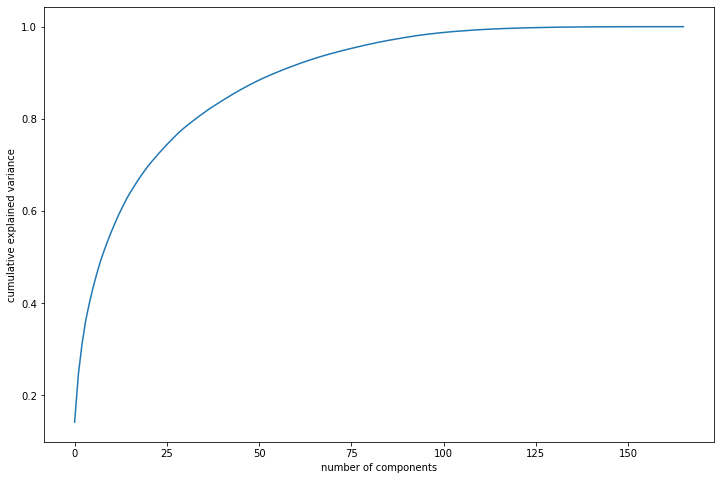

In [282]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

The graph shows that about 90% of variance in the dataset is due to first 60 components derived using PCA

In [283]:
pca=PCA(n_components=60)
X_train_p=pca.fit_transform(X_train)
X_test_p=pca.transform(X_test)

####  Model 1 Logistic Regression using PCA

In [284]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_p, y_train)
lr.score(X_test_p, y_test)

0.8546962321975843

In [285]:
lr.score(X_train_p, y_train)

0.8509521126760563

In [286]:
y_pred = lr.predict(X_test_p)
from sklearn.metrics import classification_report, f1_score, confusion_matrix
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      5526
           1       0.85      0.87      0.86      5568

    accuracy                           0.85     11094
   macro avg       0.85      0.85      0.85     11094
weighted avg       0.85      0.85      0.85     11094

0.8569907735982967


### Hyperparameter Tuning and finding best model

#### Model 2  RandomForestClassifier

In [287]:
from sklearn.ensemble import RandomForestClassifier

In [288]:
# from sklearn.ensemble import RandomForestClassifier
# for ci in ['gini', 'entropy','log_loss']:
#     rf = RandomForestClassifier(random_state=42, criterion=ci)
#     rf.fit(X_train_p, y_train)
#     print(ci, 'score: ', rf.score(X_test_p, y_test))

In [289]:
rf = RandomForestClassifier(random_state=42, criterion="gini")
rf.fit(X_train_p, y_train)
y_pred = rf.predict(X_test_p)
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      5526
           1       0.93      0.97      0.95      5568

    accuracy                           0.95     11094
   macro avg       0.95      0.95      0.95     11094
weighted avg       0.95      0.95      0.95     11094

0.9501766784452297


####  Model 3 Support Vector Machine for classification

In [290]:
from sklearn.svm import SVC
# for g in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
#     svc = SVC(gamma=g)
#     svc.fit(X_train_p, y_train)
#     print("gamma: ",g, 'score: ', svc.score(X_test_p, y_test))

In [291]:
# svc = SVC(gamma=0.1)
# svc.fit(X_train_p, y_train)
# y_pred = svc.predict(X_test_p)
# print(classification_report(y_test, y_pred))
# print(f1_score(y_test, y_pred))

### Finding important features using RandomForestClassifier

In [292]:
rf = RandomForestClassifier(random_state=123)
rf.fit(X_train, y_train)
print('score: ', rf.score(X_test, y_test))

score:  0.9690823868757887


In [293]:
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      5526
           1       0.96      0.98      0.97      5568

    accuracy                           0.97     11094
   macro avg       0.97      0.97      0.97     11094
weighted avg       0.97      0.97      0.97     11094



In [294]:
X.columns.shape

(166,)

Text(0.5, 0, 'Random Forest Feature Importance')

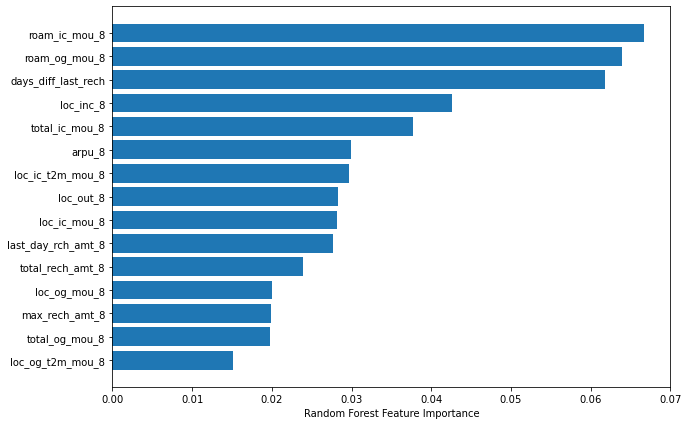

In [295]:
sorted_idx = rf.feature_importances_.argsort()[-15:]
plt.figure(figsize=(10,7))
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

These are the first 15 important features in the dataset. 